# Curious about the trends in traffic citations in SF, one of the more progressive cities in the nation

####  Keep in mind.. any inferences can only be made within the realm of cars that were stopped in traffic - assumptions about any overall populations cannot be made as we are comparing with very specific data on people who drive who got pulled over within this time period.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### This data is from 2007-01-01 to 2016-06-30
### more info can be found at: https://openpolicing.stanford.edu/data/
### check out the website and all their findings at: https://openpolicing.stanford.edu/

### SF Policing data has over 97% of data on all traffic stops in the city

In [3]:
df = pd.read_csv('PP_CA_SF_2020.csv')
df.head(10)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,37.786919,-122.426718,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
3,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,37.746380,-122.392005,NaN,NaN,hispanic,male,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
4,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,37.786348,-122.440003,NaN,NaN,white,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
5,869926,2014-08-01,00:30:00,3RD ST AND GALVEZ AVE,37.741082,-122.388433,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
6,869927,2014-08-01,00:30:00,COLUMBUS AND BROADWAY,37.797875,-122.406716,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Moving Violation,No Search,Citation
7,869928,2014-08-01,00:35:00,INGALLS & QUESADA,37.729122,-122.384013,NaN,NaN,black,female,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
8,869929,2014-08-01,01:00:00,17TH ST & BRYANT ST,37.764318,-122.410384,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
9,869930,2014-08-01,01:00:00,FULTON ST. & FUNSTON AV.,37.773166,-122.471264,NaN,NaN,white,female,...,True,False,citation,NaN,False,False,NaN,Moving Violation,No Search,Citation


In [4]:
df.shape

(905070, 22)

In [5]:
df.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'district',
       'subject_age', 'subject_race', 'subject_sex', 'type', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'search_conducted', 'search_vehicle', 'search_basis', 'reason_for_stop',
       'raw_search_vehicle_description', 'raw_result_of_contact_description'],
      dtype='object')

# looks like we've got ~905K traffic stops between Jan 2007 - Jun 2016

### let's see how many NaN / null values we have. Since we don't have any that affect the data as a whole, we can deal with the larger ones as we go. 

In [6]:
df.isnull().sum()

raw_row_number                            0
date                                      0
time                                     35
location                                 43
lat                                    1697
lng                                    1697
district                              52187
subject_age                           58888
subject_race                              0
subject_sex                               0
type                                      0
arrest_made                               0
citation_issued                           0
warning_issued                            0
outcome                               15681
contraband_found                     851689
search_conducted                          0
search_vehicle                            0
search_basis                         851689
reason_for_stop                        2212
raw_search_vehicle_description            0
raw_result_of_contact_description         0
dtype: int64

Search basis and Contraband found have the least amount of useful data. District and Subject Age come next. 
* No need to drop any columns.

# For the first few analyses, we want to engage with data on the actual subjects. Let's clean the data specific to this...

In [7]:
df.dtypes

raw_row_number                        object
date                                  object
time                                  object
location                              object
lat                                  float64
lng                                  float64
district                              object
subject_age                          float64
subject_race                          object
subject_sex                           object
type                                  object
arrest_made                             bool
citation_issued                         bool
warning_issued                          bool
outcome                               object
contraband_found                      object
search_conducted                        bool
search_vehicle                          bool
search_basis                          object
reason_for_stop                       object
raw_search_vehicle_description        object
raw_result_of_contact_description     object
dtype: obj

### Let's organize the data by date/time

In [8]:
# concatenate date and time (probably the start time)
combined = df.date.str.cat(df.time,sep=' ')

# convert combined to datetime format
df['datetime'] = pd.to_datetime(combined)
df.set_index('datetime', inplace=True)
df.head(10)

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
datetime,,,,,,,,,,,,,,,,,,,,,
2014-08-01 00:01:00,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
2014-08-01 00:01:00,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2014-08-01 00:15:00,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,37.786919,-122.426718,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2014-08-01 00:18:00,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,37.746380,-122.392005,NaN,NaN,hispanic,male,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
2014-08-01 00:19:00,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,37.786348,-122.440003,NaN,NaN,white,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2014-08-01 00:30:00,869926,2014-08-01,00:30:00,3RD ST AND GALVEZ AVE,37.741082,-122.388433,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2014-08-01 00:30:00,869927,2014-08-01,00:30:00,COLUMBUS AND BROADWAY,37.797875,-122.406716,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Moving Violation,No Search,Citation
2014-08-01 00:35:00,869928,2014-08-01,00:35:00,INGALLS & QUESADA,37.729122,-122.384013,NaN,NaN,black,female,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2014-08-01 01:00:00,869929,2014-08-01,01:00:00,17TH ST & BRYANT ST,37.764318,-122.410384,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation


# Gender & Policing

How many violations do we have overall? 

In [9]:
# raw numbers total
df.reason_for_stop.value_counts()

Moving Violation                                                                                                                                                                            563105
Mechanical or Non-Moving Violation (V.C.)                                                                                                                                                   331477
MPC Violation                                                                                                                                                                                 3542
Traffic Collision                                                                                                                                                                             1343
BOLO/APB/Warrant                                                                                                                                                                              1207
DUI Check                

### These are huge figures, working with percentages and averages may help..

In [10]:
# as proportions total
df.reason_for_stop.value_counts(normalize=True)

Moving Violation                                                                                                                                                                            0.623692
Mechanical or Non-Moving Violation (V.C.)                                                                                                                                                   0.367142
MPC Violation                                                                                                                                                                               0.003923
Traffic Collision                                                                                                                                                                           0.001487
BOLO/APB/Warrant                                                                                                                                                                            0.001337
DUI Check      

### Now let's break down gender stats in traffic stops

In [11]:
female = df[df.subject_sex=='female']
male = df[df.subject_sex=='male']

In [12]:
female.reason_for_stop.value_counts(normalize=True)

Moving Violation                                                                                        0.629405
Mechanical or Non-Moving Violation (V.C.)                                                               0.364881
Traffic Collision                                                                                       0.001612
MPC Violation                                                                                           0.001266
DUI Check                                                                                               0.000960
BOLO/APB/Warrant                                                                                        0.000927
Assistance to Motorist                                                                                  0.000761
Moving Violation|Mechanical or Non-Moving Violation (V.C.)                                              0.000154
DUI Check|MPC Violation                                                                         

In [13]:
male.reason_for_stop.value_counts(normalize=True)

Moving Violation                                                                                                                                                                            0.621312
Mechanical or Non-Moving Violation (V.C.)                                                                                                                                                   0.368084
MPC Violation                                                                                                                                                                               0.005030
BOLO/APB/Warrant                                                                                                                                                                            0.001508
Traffic Collision                                                                                                                                                                           0.001436
DUI Check      

# Now, the figures I want to examine are: outcome vs reason_for_stop relative to gender

### Moving Violations velative to outcomes

In [14]:
female_MV = df[(df.subject_sex =='female') & (df.reason_for_stop =='Moving Violation')]
male_MV = df[(df.subject_sex =='male') & (df.reason_for_stop =='Moving Violation')]

In [15]:
# Moving violation outcomes for females
female_MV.outcome.value_counts(normalize=True)

citation    0.739015
warning     0.252676
arrest      0.008309
Name: outcome, dtype: float64

In [16]:
# Moving violation outcomes for males
male_MV.outcome.value_counts(normalize=True)

citation    0.742151
warning     0.244938
arrest      0.012911
Name: outcome, dtype: float64

#### Percentages look pretty equal except that 
# males seem to get arrested more.. let's explore that
## Let's take a look at searches

In [17]:
df.search_conducted.value_counts(normalize=True)

False    0.94102
True     0.05898
Name: search_conducted, dtype: float64

In [18]:
# overall search rate
search_rate = df.search_conducted.mean()
search_rate

0.058979968400234235

In [19]:
# search rate grouped by sex
df.groupby('subject_sex').search_conducted.mean() * 100

subject_sex
female    3.375951
male      6.946915
Name: search_conducted, dtype: float64

* Search rate is twice as large for males

Maybe this is related to rates of violations per gender

Let's take a look at the average for each violation per gender.. 

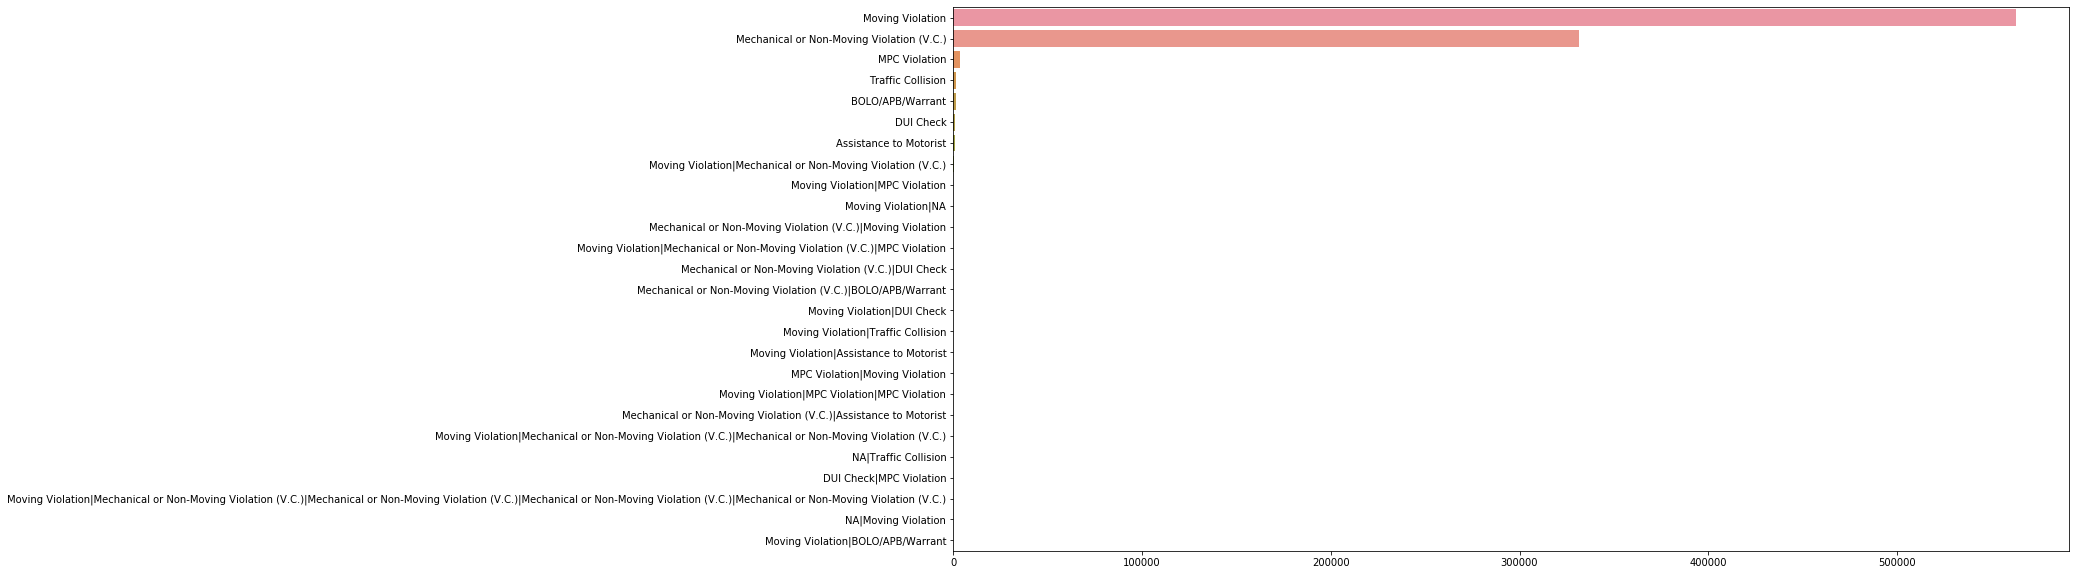

In [20]:
rfs = df['reason_for_stop'].value_counts()
rfs.sort_values(ascending=False, inplace=True)

plt.subplots(figsize=(20,10))
sns.barplot(x=rfs.values, y=rfs.index, order=rfs.index, orient='h')

### Regardless of gender... vast majority of data is highly concentrated between two violations.

#### Let's get some real figures for each of them

In [21]:
df.groupby(['reason_for_stop', 'subject_sex']).search_conducted.mean()

reason_for_stop                                                                                                                                                                           subject_sex
Assistance to Motorist                                                                                                                                                                    female         0.133663
                                                                                                                                                                                          male           0.152473
BOLO/APB/Warrant                                                                                                                                                                          female         0.443089
                                                                                                                                                                            

In [22]:
pd.crosstab(df['reason_for_stop'], df['subject_sex'])

subject_sex,female,male
reason_for_stop,,
Assistance to Motorist,202,728
BOLO/APB/Warrant,246,961
DUI Check,255,782
DUI Check|MPC Violation,1,0
MPC Violation,336,3206
MPC Violation|Moving Violation,1,1
Mechanical or Non-Moving Violation (V.C.),96874,234603
Mechanical or Non-Moving Violation (V.C.)|Assistance to Motorist,1,0
Mechanical or Non-Moving Violation (V.C.)|BOLO/APB/Warrant,1,1


## From this data we can see that from traffic stop data more than double the number of men have been pulled over more than the amount of times than women have been. 

## This would correlate with the data of the almost double rate of searches conducted. 

# We have time markers.. let's see how they relate to arrests

In [23]:
df.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'district',
       'subject_age', 'subject_race', 'subject_sex', 'type', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'search_conducted', 'search_vehicle', 'search_basis', 'reason_for_stop',
       'raw_search_vehicle_description', 'raw_result_of_contact_description'],
      dtype='object')

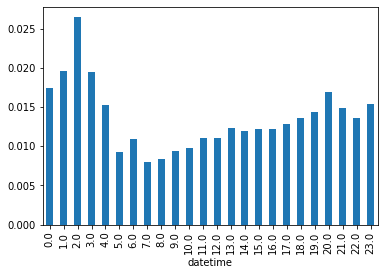

In [24]:
df.groupby(df.index.hour)['arrest_made'].mean().plot(kind='bar')

### As one might've guessed, people tend to get arrested at night because they can't see what they're doing in the dark. Particularly a spike at 2am. 

### What month do people get arrested most in? 

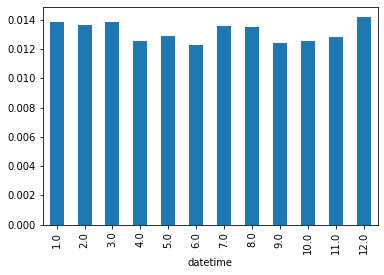

In [25]:
df.groupby(df.index.month)['arrest_made'].mean().plot(kind='bar')

Not much here.. 

## Have arrest rates been going up or down over time? 

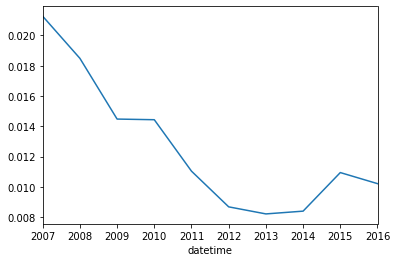

In [26]:
df.groupby(df.index.year)['arrest_made'].mean().plot()

### Staggering drop in arrest rates over time. Bravo SFPD !!

# On the topic of arrests, let's take a look at the rate of drug related stops over time

## To get an idea of the over all population breakdown of SF, I brought in some facts from the government Census:
https://www.census.gov/quickfacts/sanfranciscocountycalifornia

* White alone, percent	52.9%
* Black or African American alone, percent(a)	5.6%
* American Indian and Alaska Native alone, percent(a)	0.7%
* Asian alone, percent(a)	35.9%
* Hispanic or Latino, percent(b)	15.2%
-------------
* White alone, not Hispanic or Latino, percent	40.3%

* Native Hawaiian and Other Pacific Islander alone, percent(a)	0.5%
* Two or More Races, percent	4.4%


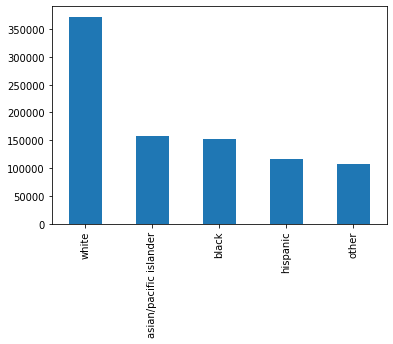

In [27]:
# Traffic stop Race break down
# Figures are on somewhat par with population census

df.subject_race.value_counts().plot(kind="bar")

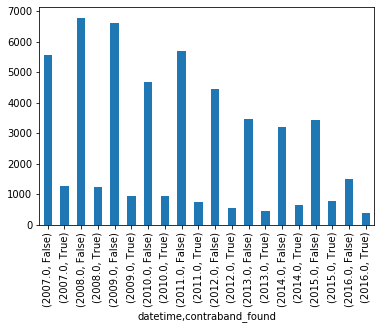

In [28]:
# Drug related stops over the years

df.groupby(df.index.year)['contraband_found'].value_counts().plot(kind="bar")

## Consistent number of drug related stops, but far fewer overall stops where a search was conducted over time... this could be a good thing, but we don't know why this is the case

## We have systemic injustice witnessed through our police force toward black people in the US. 

### It's not hard to see - take a look at the Trayvon Martin case. A great video with many helpful, simple facts - statistics - and why and how this is a problem can be found in the video description: 
https://www.youtube.com/watch?v=GQdMgtncpoE

# I want to see the numbers in action in SF

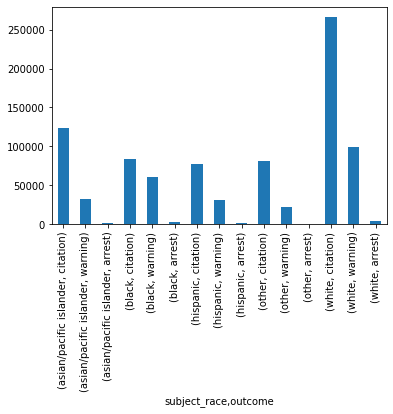

In [29]:
# outcome of stops relative to race

df.groupby(df.subject_race)['outcome'].value_counts().plot(kind="bar")

# Let's take a look at the frequency of violations relative to district

In [30]:
zones = pd.crosstab(df.district, df.reason_for_stop)
zones

reason_for_stop,Assistance to Motorist,BOLO/APB/Warrant,DUI Check,MPC Violation,MPC Violation|Moving Violation,Mechanical or Non-Moving Violation (V.C.),Mechanical or Non-Moving Violation (V.C.)|Assistance to Motorist,Mechanical or Non-Moving Violation (V.C.)|BOLO/APB/Warrant,Mechanical or Non-Moving Violation (V.C.)|DUI Check,Mechanical or Non-Moving Violation (V.C.)|Moving Violation,...,Moving Violation|MPC Violation|MPC Violation,Moving Violation|Mechanical or Non-Moving Violation (V.C.),Moving Violation|Mechanical or Non-Moving Violation (V.C.)|MPC Violation,Moving Violation|Mechanical or Non-Moving Violation (V.C.)|Mechanical or Non-Moving Violation (V.C.),Moving Violation|Mechanical or Non-Moving Violation (V.C.)|Mechanical or Non-Moving Violation (V.C.)|Mechanical or Non-Moving Violation (V.C.)|Mechanical or Non-Moving Violation (V.C.),Moving Violation|NA,Moving Violation|Traffic Collision,NA|Moving Violation,NA|Traffic Collision,Traffic Collision
district,,,,,,,,,,,,,,,,,,,,,
A,43,51,81,652,0,17779,0,0,0,0,...,0,16,2,0,0,2,0,0,0,98
B,87,119,103,630,0,29168,0,0,0,1,...,1,26,1,1,0,1,0,0,0,165
C,125,287,80,249,0,44486,0,0,0,0,...,0,24,0,0,0,0,0,0,0,95
D,99,163,152,224,0,31471,0,0,0,0,...,0,26,0,0,0,0,0,1,1,149
E,101,121,178,356,0,24133,0,0,0,0,...,0,19,0,0,0,0,0,0,0,154
F,37,25,51,52,0,25291,0,0,0,1,...,0,6,0,0,0,0,0,0,0,47
G,99,34,82,118,0,29526,0,0,1,1,...,0,5,0,0,0,0,0,0,0,101
H,119,153,123,343,0,51329,0,1,0,0,...,0,24,0,0,0,0,0,0,0,161
I,81,80,100,160,0,41717,1,0,1,1,...,0,15,0,0,1,1,2,0,0,209


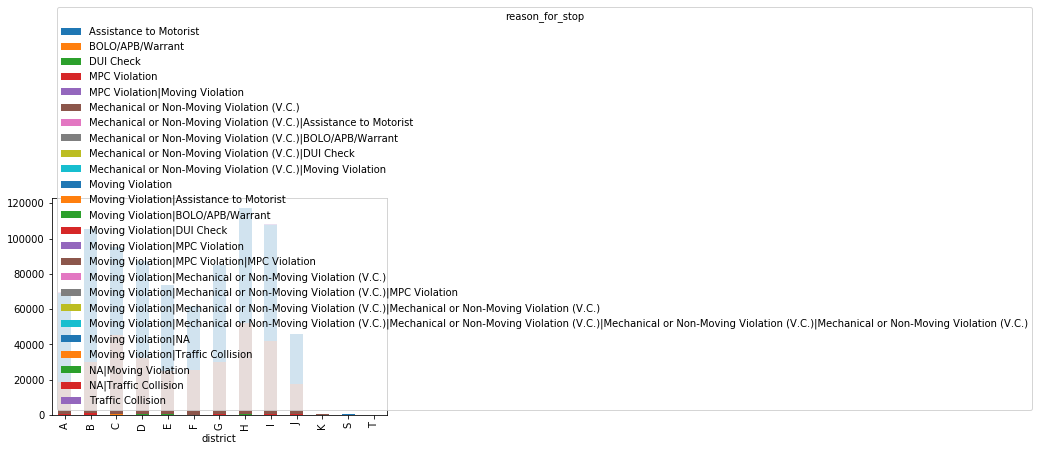

In [31]:
zones.plot(kind='bar', stacked=True)

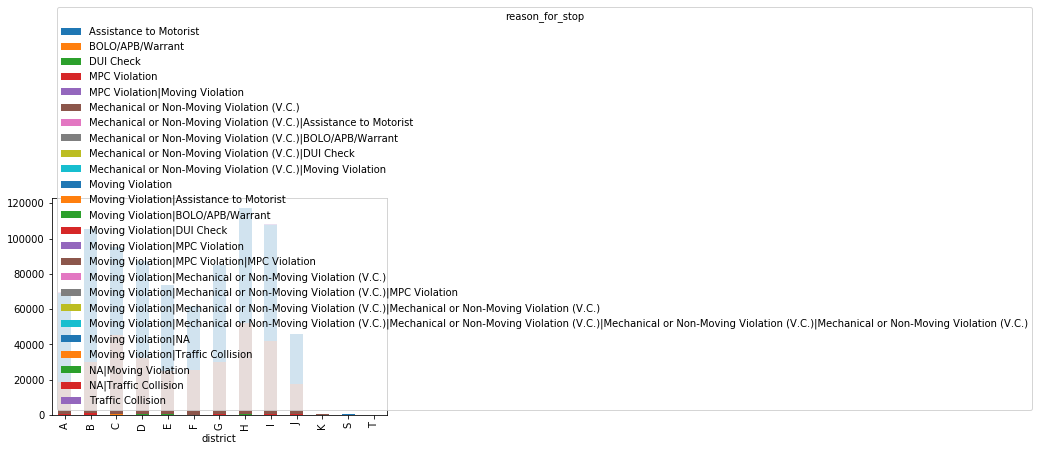

In [32]:
# Now we know the higher infraction districts in the city

zones.plot(kind='bar', stacked=True, legend=True)

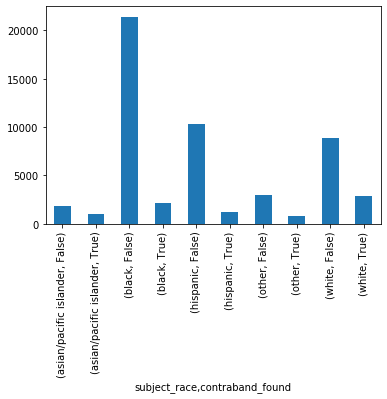

In [33]:
# Given that a search was conducted, these are the figures
# by race, whether contraband was found in the search

df.groupby(df.subject_race)['contraband_found'].value_counts().plot(kind='bar')

In [34]:
contra = df.groupby(df.index.year)['contraband_found'].value_counts()
contra

datetime  contraband_found
2007.0    False               5577
          True                1261
2008.0    False               6782
          True                1252
2009.0    False               6617
          True                 958
2010.0    False               4682
          True                 956
2011.0    False               5701
          True                 736
2012.0    False               4435
          True                 538
2013.0    False               3458
          True                 459
2014.0    False               3210
          True                 661
2015.0    False               3426
          True                 772
2016.0    False               1517
          True                 383
Name: contraband_found, dtype: int64

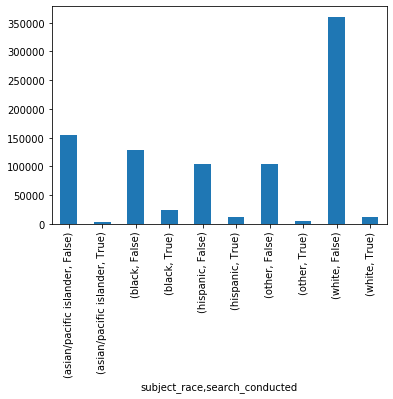

In [53]:
# number of people per race where a search was conducted or not

df.groupby(df.subject_race)['search_conducted'].value_counts().plot(kind='bar')

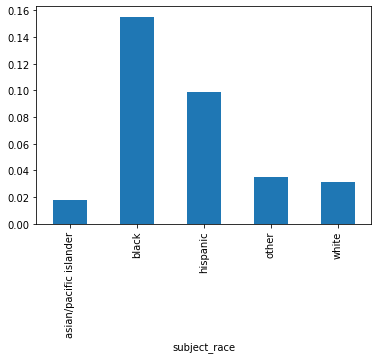

In [46]:
# rate of search conducted per race

df.groupby(df.subject_race)['search_conducted'].mean().plot(kind='bar')

## Far higher search rate for all relative to white except for asian/pacific islander

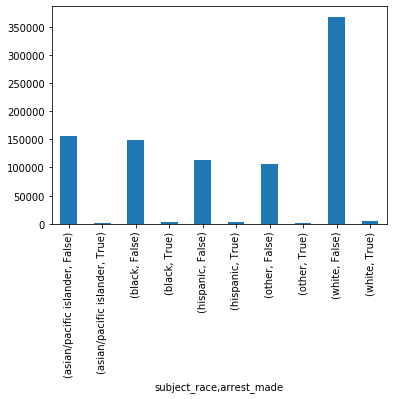

In [54]:
# arrests per race seem consistent with population data

df.groupby(df.subject_race)['arrest_made'].value_counts().plot(kind='bar')

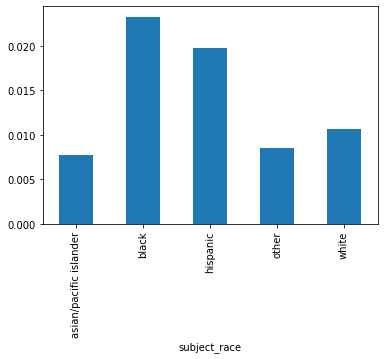

In [55]:
# but the average arrest rate per race shows a larger rate for the smallest groups of people 

df.groupby(df.subject_race)['arrest_made'].mean().plot(kind='bar')

## Interesting that even though the reason for stop was generally only one of two options, a Moving Violation or Mechanical Failure both of which were mild infractions.... that black and hispanic people were searched in far greater numbers than white people.

## This is still highly inconclusive.... this is far too little data and it would be a *crime* to make any sort of conclusion (hah).....

# * We know the rates are far higher for the smaller populations.... but when we have such insane differences in population (or sample sizes) for each race (50% white vs a mere 6% black) it is not indicative of anything at all.

### * Although, we can see that the higher rates I will have to do more data science magic for any real results

## Why are we getting such staggering numbers?? Let's take a look at some raw data for the violations outside of these two mundane ones.... maybe that can shed some light..

In [49]:
df.groupby(df.subject_race)['reason_for_stop'].value_counts()

subject_race            reason_for_stop                                                                                     
asian/pacific islander  Moving Violation                                                                                        103355
                        Mechanical or Non-Moving Violation (V.C.)                                                                53371
                        MPC Violation                                                                                              255
                        Traffic Collision                                                                                          254
                        DUI Check                                                                                                  135
                                                                                                                                 ...  
white                   Mechanical or Non-Moving Violation (V.C.)

In [56]:
pd.set_option('display.max_columns', None)
pd.crosstab(df.subject_race, df.reason_for_stop)

reason_for_stop,Assistance to Motorist,BOLO/APB/Warrant,DUI Check,DUI Check|MPC Violation,MPC Violation,MPC Violation|Moving Violation,Mechanical or Non-Moving Violation (V.C.),Mechanical or Non-Moving Violation (V.C.)|Assistance to Motorist,Mechanical or Non-Moving Violation (V.C.)|BOLO/APB/Warrant,Mechanical or Non-Moving Violation (V.C.)|DUI Check,Mechanical or Non-Moving Violation (V.C.)|Moving Violation,Moving Violation,Moving Violation|Assistance to Motorist,Moving Violation|BOLO/APB/Warrant,Moving Violation|DUI Check,Moving Violation|MPC Violation,Moving Violation|MPC Violation|MPC Violation,Moving Violation|Mechanical or Non-Moving Violation (V.C.),Moving Violation|Mechanical or Non-Moving Violation (V.C.)|MPC Violation,Moving Violation|Mechanical or Non-Moving Violation (V.C.)|Mechanical or Non-Moving Violation (V.C.),Moving Violation|Mechanical or Non-Moving Violation (V.C.)|Mechanical or Non-Moving Violation (V.C.)|Mechanical or Non-Moving Violation (V.C.)|Mechanical or Non-Moving Violation (V.C.),Moving Violation|NA,Moving Violation|Traffic Collision,NA|Moving Violation,NA|Traffic Collision,Traffic Collision
subject_race,,,,,,,,,,,,,,,,,,,,,,,,,,
asian/pacific islander,92,66,135,0,255,0,53371,0,1,0,0,103355,1,0,0,1,0,20,1,0,0,1,1,0,0,254
black,240,646,188,0,930,0,73479,0,0,0,0,75450,0,1,0,2,0,29,0,0,0,0,0,0,0,169
hispanic,178,201,211,0,556,0,47086,0,1,0,3,67012,0,0,0,1,0,33,1,0,0,1,0,1,1,312
other,91,86,108,0,797,1,32357,0,0,0,0,73106,0,0,0,6,0,15,1,0,1,1,1,0,0,133
white,329,208,395,1,1004,1,125184,1,0,2,1,244182,1,0,2,4,1,74,0,1,0,2,0,0,0,475


In [62]:
df.groupby(df.subject_race)['reason_for_stop'].value_counts()

subject_race            reason_for_stop                                                                                     
asian/pacific islander  Moving Violation                                                                                        103355
                        Mechanical or Non-Moving Violation (V.C.)                                                                53371
                        MPC Violation                                                                                              255
                        Traffic Collision                                                                                          254
                        DUI Check                                                                                                  135
                                                                                                                                 ...  
white                   Mechanical or Non-Moving Violation (V.C.)

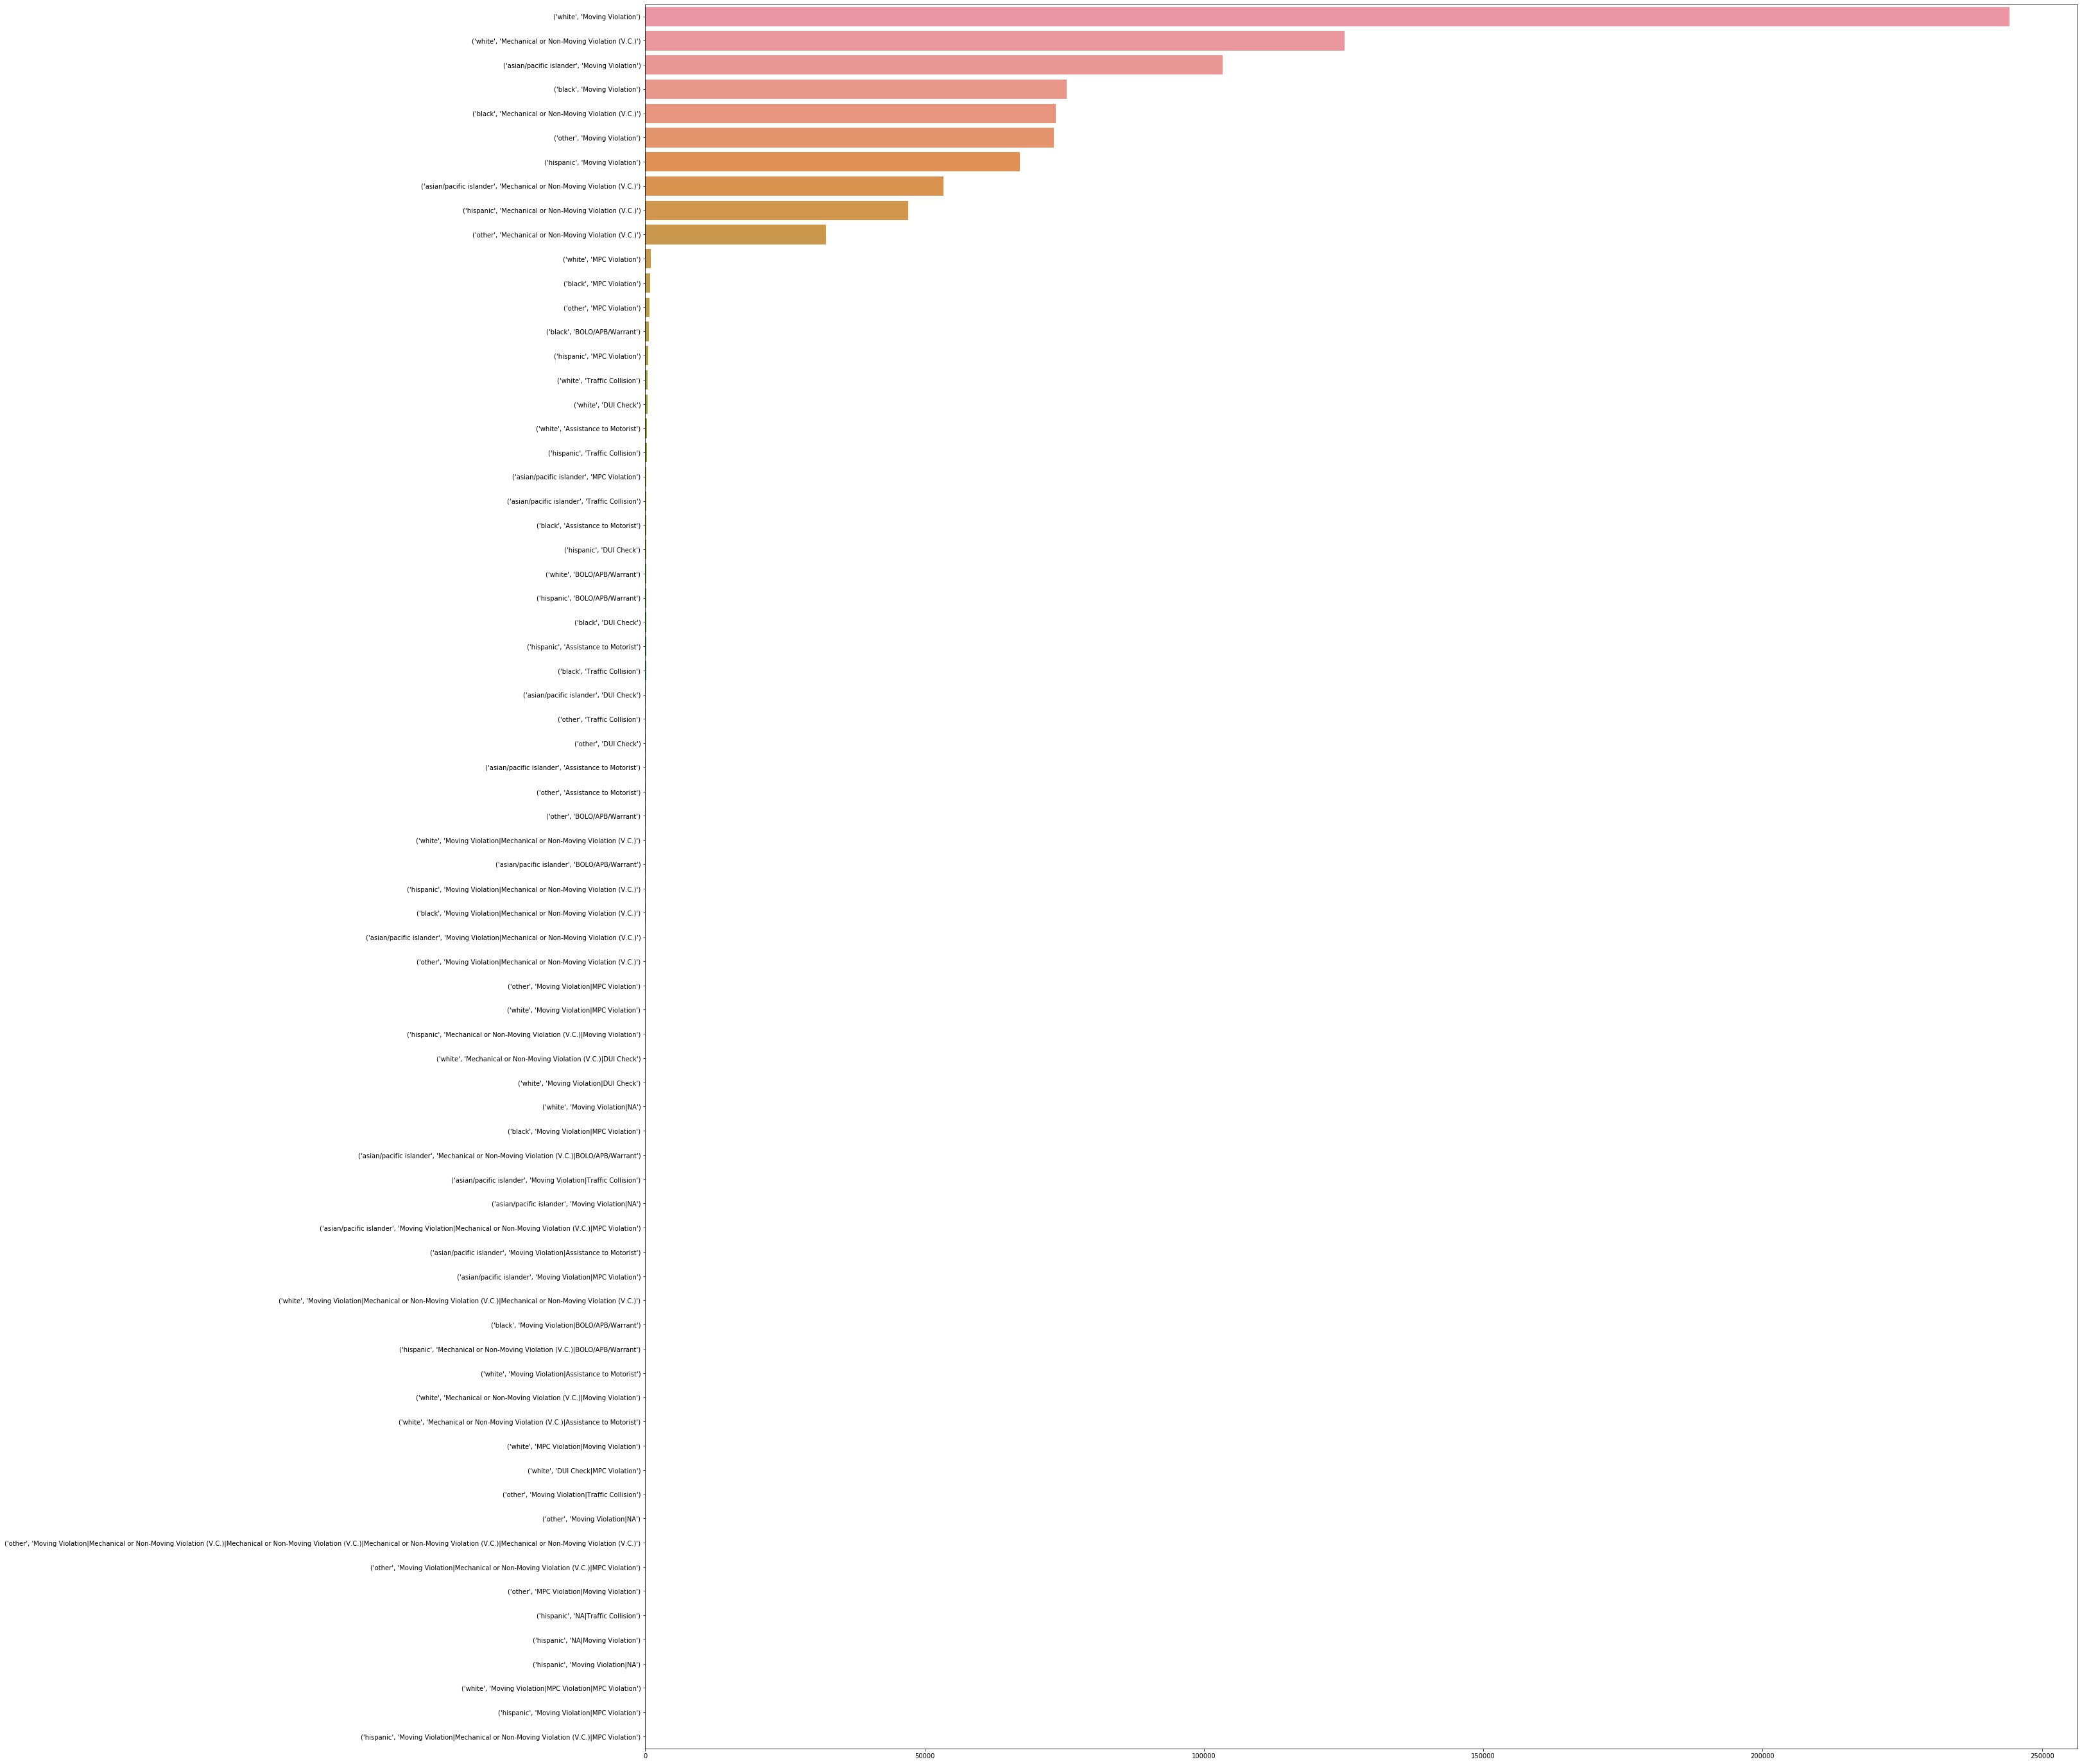

In [68]:
rr = df.groupby(df.subject_race)['reason_for_stop'].value_counts()
rr.sort_values(ascending=False, inplace=True)

plt.subplots(figsize=(40,50))
sns.barplot(x=rr.values, y=rr.index, order=rr.index, orient='h')